# Příspěvky na transparentním účtu Lidé PRO

- základní statistiky a grafy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid", palette="colorblind", font_scale=1.1, rc={'figure.figsize':(16,8)})

## Načtení dat

- načte všechny transakce z transparentního účtu
  - aktuálně je definováno rozmezí 20.10.2020 (pár dní před prvními příspěvky) až 31.12.2020
- pročistí data pro účely dalších výpočtů

In [2]:
[sumy, tx] = pd.read_html("https://ib.fio.cz/ib/transparent?a=20308993&f=20.10.2020&t=31.12.2020")
sumy

,Stav k: 20.10.2020,Stav k: 26.12.2020,Suma příjmů,Suma výdajů,Suma celkem,Běžný zůstatek
0,"0,00 CZK","123 104,51 CZK","1 663 125,51 CZK","-1 540 021,00 CZK","123 104,51 CZK","123 104,51 CZK"


In [3]:
# reverse order and replace NaNs
tx = tx.iloc[::-1].fillna('')
# set Datum as index
tx.index = pd.to_datetime(tx['Datum'], dayfirst=True)
tx = tx.drop(columns=["Datum"])
# convert Částka to float
tx['Částka'] = tx['Částka'].str.replace(",", ".").str.replace(r"[^0-9.\-]", "").astype(float)
# exclude negative values (i.e. expenses)
tx = tx[tx['Částka'] > 10]
tx

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-10-23,2021.0,Platba převodem uvnitř banky,"Minář, Mikuláš","Dar - PRO šťastnou plavbu, PRO lepší ČR.",,,,"Dar - PRO šťastnou plavbu, PRO lepší ČR."
2020-10-23,2021.0,Okamžitá příchozí platba,Ženatá Kamila,,0,,,Ženatá Kamila
2020-10-23,200.0,Okamžitá příchozí platba,Baloun Marek,Ať se daří,0,,,Baloun Marek
2020-10-23,666.0,Platba převodem uvnitř banky,"Beneš, Tomáš",Pravidelny prispevek Ceske cirkve satanisicke,,,,Pravidelny prispevek Ceske cirkve satanisicke
2020-10-23,1111.0,Platba převodem uvnitř banky,"Bulant, Vladislav",,,,,
...,...,...,...,...,...,...,...,...
2020-12-24,100.0,Platba převodem uvnitř banky,"ing. Pulchart, Václav",fandím vám....jste nadějí pro slušnou ČR,,322628,1,fandím vám....jste nadějí pro slušnou ČR
2020-12-25,200.0,Okamžitá příchozí platba,Vaněk Jindřich,,0,,,Vaněk Jindřich
2020-12-25,2021.0,Okamžitá příchozí platba,Hrabinová Klára,hodne stesti!,0,322630,1,Hrabinová Klára


## Základní statistiky

- počet, průměr, směrodatná odchylka, minimum, maximum, kvantily
- kvantil *50%* je medián

In [4]:
tx.describe()

,Částka
count,700.000000
mean,2375.886414
std,13457.737250
min,50.000000
25%,500.000000
50%,500.000000
75%,1000.000000
max,297059.450000


## Výše příspěvků v jednotlivé dny

<AxesSubplot:title={'center':'Vybraná částka v jednotlivé dny'}, xlabel='Datum'>

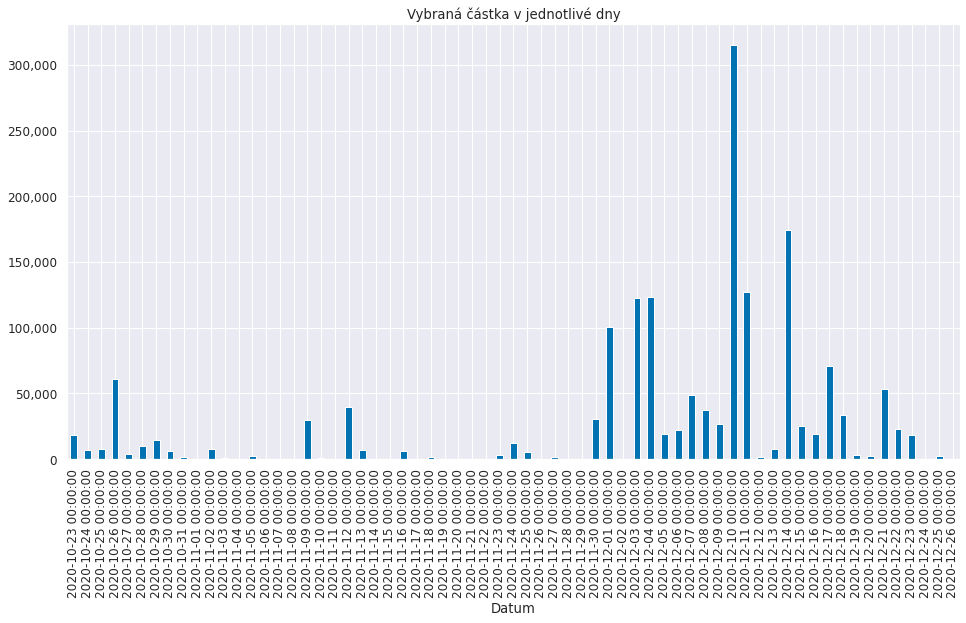

In [5]:
# contributions by days (+ filling the gaps)
cbd = tx['Částka'].groupby('Datum').sum().resample("1d").agg(np.sum)

plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.plot(kind='bar', ax=ax, title='Vybraná částka v jednotlivé dny')

## Celková suma příspěvků v čase

<AxesSubplot:title={'center':'Vývoj celkové vybrané sumy v čase'}, xlabel='Datum'>

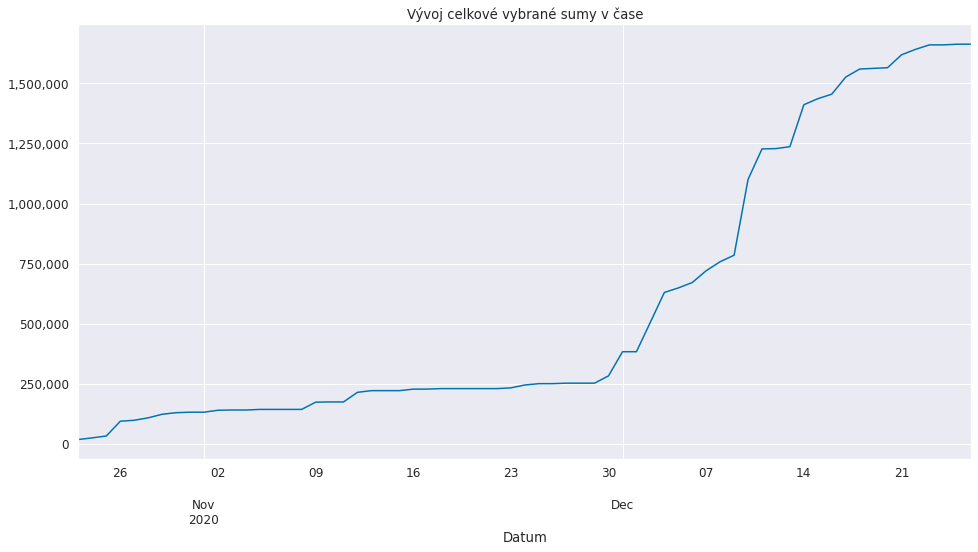

In [6]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.cumsum().plot(ax=ax, title='Vývoj celkové vybrané sumy v čase')

## Nejčetnější výše příspěvků

- jakými částkami přispívají lidé nejčastěji

In [7]:
# amount frequencies
amf = tx.value_counts(['Částka']).to_frame(name='Četnost')
amf['% Příspěvků'] = (100 * amf['Četnost'] / amf['Četnost'].sum()).round(2)
amf['% Vybraného'] = (100 * amf.index.get_level_values(0) * amf['Četnost'] / (amf.index.get_level_values(0) * amf['Četnost']).sum()).round(2)
amf.sort_values(by=['Četnost','% Vybraného'], ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
1000.0,202,28.86,12.15
500.0,187,26.71,5.62
2021.0,66,9.43,8.02
200.0,57,8.14,0.69
100.0,50,7.14,0.30
300.0,22,3.14,0.40
5000.0,18,2.57,5.41
250.0,13,1.86,0.20
2000.0,6,0.86,0.72


## Nejvýznamnější výše příspěvků

* které výše přispěvku přispívají nejvíc k celkové sumě

In [8]:
amf.sort_values(by='% Vybraného', ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
297059.45,1,0.14,17.86
1000.00,202,28.86,12.15
2021.00,66,9.43,8.02
120792.51,1,0.14,7.26
100000.00,1,0.14,6.01
50000.00,2,0.29,6.01
500.00,187,26.71,5.62
5000.00,18,2.57,5.41
40000.00,2,0.29,4.81


## Nejvyyší příspěvky

In [9]:
tx.sort_values(by='Částka', ascending=False)[:10]

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-12-10,297059.45,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Souhrn drobných plateb kartou přes platební br...
2020-12-11,120792.51,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Souhrn drobných plateb kartou přes platební br...
2020-12-01,100000.00,Bezhotovostní příjem,Zdeněk Rýzner,Zdeněk Rýzner,,,,Zdeněk Rýzner
2020-12-17,50000.00,Okamžitá příchozí platba,Pavel Grünfeld,"Doufám, že vznikne něco trvalého co",0,,,Pavel Grünfeld
2020-10-26,50000.00,Bezhotovostní příjem,TOMAS ZAJIC,"VĚŘIT V NĚKOHO NEZNAMENÁ, ŽE UDĚLÁTO CO CHCI, ...",77,,,TOMAS ZAJIC
2020-12-14,45870.31,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Souhrn drobných plateb kartou přes platební br...
2020-12-14,40000.00,Bezhotovostní příjem,Hausenblas Martin,,0,,,Hausenblas Martin
2020-11-12,40000.00,Bezhotovostní příjem,Hausenblas Martin,,0,,,Hausenblas Martin
2020-12-14,32303.72,Bezhotovostní příjem,STRIPE TECHNOLOGY EU,STRIPE,0,0,0,Souhrn drobných plateb kartou přes platební br...


## Velcí vs. malí dárci

- jaká část se vybrala v příspěvcích nad 10 tisíc a jaká část v příspěvcích pod 10 000 Kč

<AxesSubplot:title={'center':'Podíly různých výší příspěvků na celkové vybrané sumě'}, ylabel='Částka'>

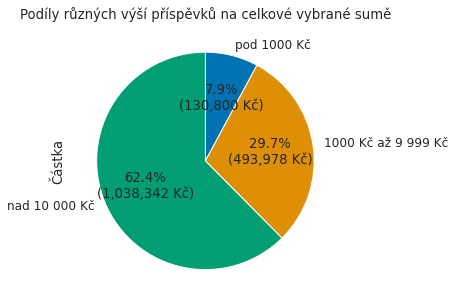

In [10]:
bins = [0, 1000, 10000, (tx['Částka'].max() // 10000 + 1)*10000]
labels = ['pod 1000 Kč','1000 Kč až 9 999 Kč','nad 10 000 Kč']
txg = tx['Částka'].groupby(by=pd.cut(tx['Částka'], bins=bins, labels=labels, right=False)).sum()
txg.plot.pie(counterclock=False, startangle=90, title='Podíly různých výší příspěvků na celkové vybrané sumě',
            autopct=lambda pct: "{:1.1f}%\n({:,} Kč)".format(pct, int(txg.sum()*pct/100)), figsize=(5,5))

In [11]:
(f"{tx[tx['Název protiúčtu'] == 'STRIPE TECHNOLOGY EU']['Částka'].sum():,} Kč z celkové sumy {tx['Částka'].sum():,} Kč " +
f" (tj. {100 * tx[tx['Název protiúčtu'] == 'STRIPE TECHNOLOGY EU']['Částka'].sum() / tx['Částka'].sum():1.1f} %) od STRIPE")

'646,184.6000000001 Kč z celkové sumy 1,663,120.49 Kč  (tj. 38.9 %) od STRIPE'

In [12]:
tx[tx['Název protiúčtu'] == 'STRIPE TECHNOLOGY EU']["Poznámka"].iloc[2]

'Souhrn drobných plateb kartou přes platební bránu. Konkrétní seznam najdete na našem webu.'

# Podpisy pod petici

In [13]:
from urllib.request import urlopen
import json

url = "https://firestore.googleapis.com/v1/projects/ka-s-workplace/databases/(default)/documents/public-signed"
signs = []
data = json.load(urlopen(f"{url}?pageSize=200&orderBy=ID"))

while "nextPageToken" in data:
    nextpage = data["nextPageToken"]
    signs += [ { **{ k:list(v.values())[0] for (k,v) in s["fields"].items() }, "createTime": s["createTime"] }
              for s in data["documents"] ]
    if len(signs) % 1000 == 0: print("x" if len(signs) % 10000 == 0 else "v" if len(signs) % 5000 == 0 else ".", end='')
    data = json.load(urlopen(f"{url}?pageSize=200&orderBy=ID&pageToken={nextpage}"))

....v....x....v.

In [14]:
sg = pd.DataFrame(signs).astype({"ID": "uint64", "createTime": "datetime64"}).set_index("ID")[
    ["name", "surname", "occupation", "city", "cityId", "interest", "createTime"]].fillna("")
sg

,name,surname,occupation,city,cityId,interest,createTime
ID,,,,,,,
1,Mikuláš,Minář,zakladatel Lidé PRO,Vodňany (okres Strakonice),551953,Pro nové lidi v politice. Pro lidský a pozitiv...,2020-12-03 12:38:21.355539
2,Alena,Švejnohová,starostka Peček,Pečky (okres Kolín),537641,"Pro zemi, v níž lze skloubit práci a rodinu a ...",2020-12-03 12:48:43.213233
3,David,Ondráčka,protikorupční expert,Praha (okres Hlavní město Praha),554782,"Pro zemi, kde platí pravidla pro všechny a kde...",2020-12-03 12:50:13.169002
4,Martin,Hausenblas,"podnikatel, komunální zastupitel",Ústí nad Labem (okres Ústí nad Labem),554804,"Pro moderní, prosperující a udržitelné Česko.",2020-12-03 12:53:09.031726
5,Roman,Rozbroj,Prodejce,Karviná (okres Karviná),598917,"Pro budování kvalitní, efektivní a transparent...",2020-12-03 12:53:34.518976
...,...,...,...,...,...,...,...
21404,Petr,Kaštovský,,Praha (okres Hlavní město Praha),554782,,2020-12-26 14:46:18.338682
21405,,,,,,,2020-12-26 14:56:27.576097
21406,Libor Pešík,Pešík,Operátor,Jihlava (okres Jihlava),586846,"Pro všechno,co nás zbaví téhle zlodějské a pro...",2020-12-26 15:02:56.199264


In [15]:
#sg.to_csv("./data/lidepro-podpisy.csv")

In [16]:
okrbn = sg[(sg["city"].str.contains("(okres Benešov)", regex=False))]
bn = sg[(sg["city"].str.contains("Benešov (okres Benešov)", regex=False))]
bn2 = okrbn[~okrbn.index.isin(bn.index)].sort_values(["city", "ID"])
bn2.sort_values("ID")[-10:]

,name,surname,occupation,city,cityId,interest,createTime
ID,,,,,,,
19698,Pavlina,Burešová,Zdravotní sestra,Vlašim (okres Benešov),530883,Jsem pro férové jednání a říkání pravdy lidem....,2020-12-21 08:15:56.676878
19831,Miroslav,Holík,,Chocerady (okres Benešov),529796,,2020-12-21 13:32:23.557711
19868,Petra,Voláková,Mateřská dovolená,Vrchotovy Janovice (okres Benešov),530948,,2020-12-21 15:10:48.285678
20861,Šimon,Rechner,IT,Pyšely (okres Benešov),538680,,2020-12-24 07:24:54.691205
20863,Daniela,Dolejšová,student,Čerčany (okres Benešov),529516,,2020-12-24 07:31:20.860629
20917,Lukáš,Škrabánek,,Vlašim (okres Benešov),530883,,2020-12-24 11:27:16.861398
20942,David,Vašíček,Učitel,Čtyřkoly (okres Benešov),529567,,2020-12-24 13:05:55.556706
21018,Jana,Bloudkova,Pedagog,Votice (okres Benešov),530905,Nové nastavení priorit v souladu se setrnym vy...,2020-12-24 22:21:40.797713
21262,Helena,Šaldová,Psycholog,Čerčany (okres Benešov),529516,"Doskuzi do hloubky, pevnost a laskavost",2020-12-26 02:50:58.176894


## Word cloud dle obcí

In [17]:
#!pip install wordcloud

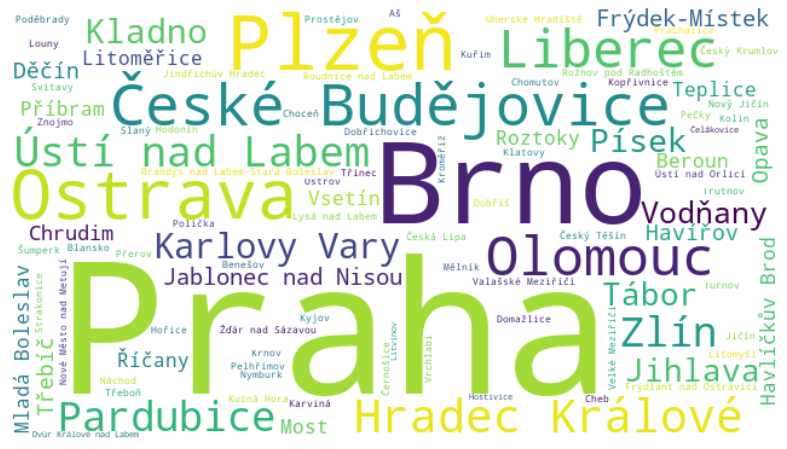

In [18]:
from wordcloud import WordCloud

freqs = sg["city"].str.replace(" \(okres [^)]+\)", "").value_counts()
wordcloud = WordCloud(width=640, height=360, background_color="white", max_words=100).generate_from_frequencies(freqs)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
sg[(sg["city"].str.contains("Vlašim (", regex=False))]

,name,surname,occupation,city,cityId,interest,createTime
ID,,,,,,,
4770,Pavel,Kotyza,OSVČ,Vlašim (okres Benešov),530883,Jsem PRO maximální trasnparentnost finančních ...,2020-12-03 19:44:55.416068
7525,Kamil,Fišer,,Vlašim (okres Benešov),530883,,2020-12-04 10:25:13.972011
13885,Jan,Mleziva,exportní prodejce,Vlašim (okres Benešov),530883,,2020-12-08 14:40:41.662118
17413,Natálie,Štětinová,studentka,Vlašim (okres Benešov),530883,,2020-12-15 08:16:02.491275
18947,Leila,Seidlová,Zubní lékařka,Vlašim (okres Benešov),530883,,2020-12-19 11:53:00.846550
19698,Pavlina,Burešová,Zdravotní sestra,Vlašim (okres Benešov),530883,Jsem pro férové jednání a říkání pravdy lidem....,2020-12-21 08:15:56.676878
20917,Lukáš,Škrabánek,,Vlašim (okres Benešov),530883,,2020-12-24 11:27:16.861398


## Word cloud povolání ve tvaru ČR

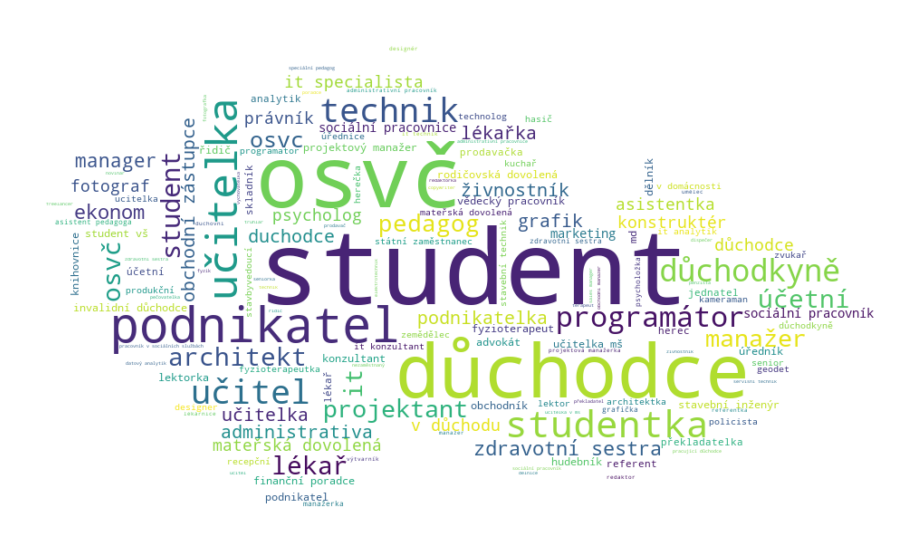

In [20]:
from PIL import Image

freqs = sg["occupation"].str.lower().value_counts()
mask = np.array(Image.open("image/cesko-maska.png"))
wordcloud = WordCloud(background_color="white", max_words=150, mask=mask).generate_from_frequencies(freqs)

plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word cloud sloupce interest

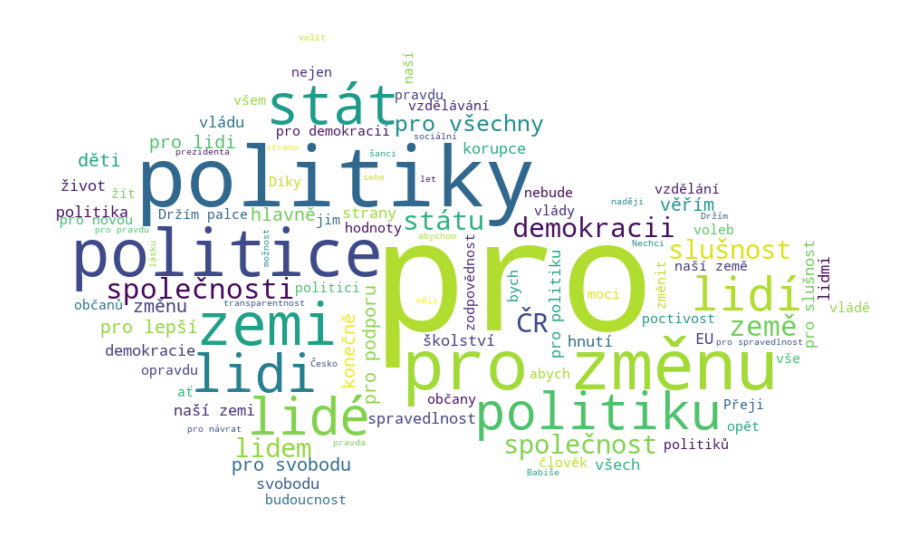

In [21]:
from wordcloud import STOPWORDS

stopwords = json.load(open("./data/stop_words_czech.json"))
stopwords.remove("pro")
mask = np.array(Image.open("image/cesko-maska.png"))
wordcloud = (WordCloud(width=640, height=360, background_color="white", max_words=100, stopwords=stopwords, mask=mask)
             .generate(" ".join(sg["interest"])))

plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Vývoj podpisů v čase

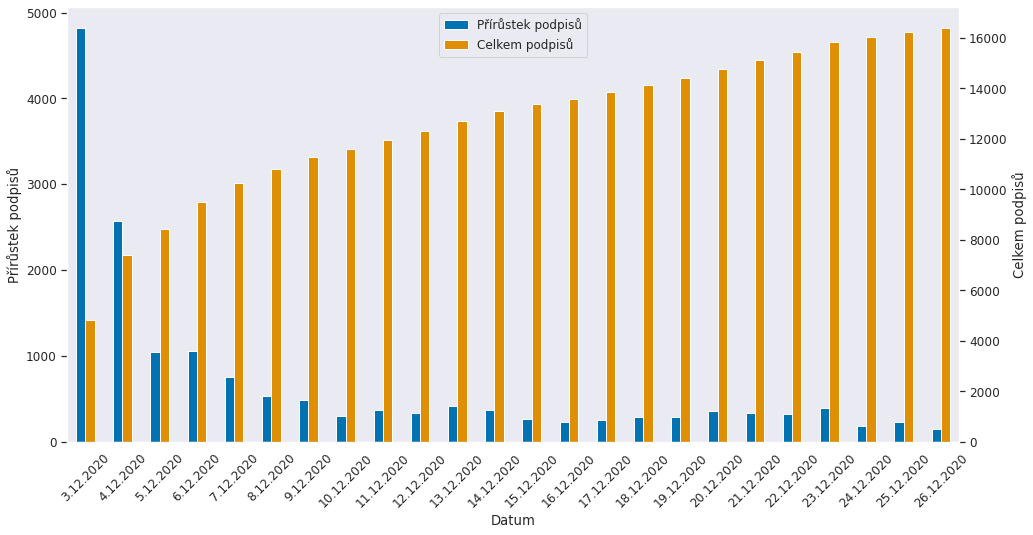

In [22]:
sgbyday = sg.set_index("createTime").index.rename("Datum").to_series().resample("1d").count().rename("Přírůstek podpisů").to_frame()
sgbyday["Celkem podpisů"] = sgbyday["Přírůstek podpisů"].cumsum()


ax = sgbyday.plot.bar(secondary_y="Celkem podpisů")

ax.set_ylabel('Přírůstek podpisů')
ax.right_ax.set_ylabel('Celkem podpisů')

ax.right_ax.grid(False)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')

ax.set_xticklabels([x.strftime("%-d.%-m.%Y") for x in sgbyday.index], rotation=45)

plt.show()